In [25]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, auc, f1_score, accuracy_score, precision_score, recall_score, roc_curve, precision_recall_curve 
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('data/model_data.csv')


data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41185 entries, 0 to 41184
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               41185 non-null  int64  
 1   job               41185 non-null  object 
 2   marital           41185 non-null  object 
 3   education         41185 non-null  object 
 4   default           41185 non-null  object 
 5   housing           41185 non-null  object 
 6   loan              41185 non-null  object 
 7   contact           41185 non-null  object 
 8   month             41185 non-null  object 
 9   day_of_week       41185 non-null  object 
 10  campaign          41185 non-null  int64  
 11  contacted_before  41185 non-null  int64  
 12  previous          41185 non-null  int64  
 13  poutcome          41185 non-null  object 
 14  emp.var.rate      41185 non-null  float64
 15  cons.price.idx    41185 non-null  int64  
 16  cons.conf.idx     41185 non-null  int64 

In [26]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week', 'contacted_before', 'poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data_final=data[to_keep]
data_final.columns.values
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41185 entries, 0 to 41184
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41185 non-null  int64  
 1   campaign                       41185 non-null  int64  
 2   previous                       41185 non-null  int64  
 3   emp.var.rate                   41185 non-null  float64
 4   cons.price.idx                 41185 non-null  int64  
 5   cons.conf.idx                  41185 non-null  int64  
 6   euribor3m                      41185 non-null  int64  
 7   nr.employed                    41185 non-null  int64  
 8   subscribed                     41185 non-null  int64  
 9   job_admin.                     41185 non-null  uint8  
 10  job_blue-collar                41185 non-null  uint8  
 11  job_entrepreneur               41185 non-null  uint8  
 12  job_housemaid                  41185 non-null 

In [9]:
#initial cols
#cols=['previous', 'emp.var.rate', 'euribor3m', 'job_blue-collar', 'job_entrepreneur', 'job_management', 'job_retired', 'job_services', 'job_student', 'education_basic.9y', 'default_unknown', 'contact_cellular', 'contact_telephone', 'month_dec', 'month_jul', 'month_jun', 'month_may', 'month_nov', 'day_of_week_fri', 'day_of_week_mon']

#adjusted with p values cols
#cols=['emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed', 'job_retired', 'job_student', 'default_no', 'contact_cellular', 'month_apr', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_oct', 'day_of_week_mon', 'contacted_before_0', 'contacted_before_1', 'poutcome_failure', 'poutcome_success']
#X=data_X[cols]
#y=data_y['subscribed']

In [18]:
def filter_strings(string_arr, boolean_arr):
    filtered_arr = []
    for i in range(len(string_arr)):
        if boolean_arr[i]:
            filtered_arr.append(string_arr[i])
    return filtered_arr


filtered_strings = filter_strings(X, rfe.support_.tolist())
print(filtered_strings)

['marital_divorced', 'marital_married', 'marital_single', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_professional.course', 'education_university.degree', 'education_unknown', 'housing_no', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed']


In [19]:
#initial cols
cols=['euribor3m', 'marital_divorced', 'marital_married', 'marital_single', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_professional.course', 'education_university.degree', 'education_unknown', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed']
#adjusted with p values cols
#cols=['previous', 'emp.var.rate', 'euribor3m', 'job_blue-collar','job_retired', 'job_services', 'job_student', 'default_unknown', 'contact_cellular', 'contact_telephone', 'month_jul', 'month_jun', 'month_may','day_of_week_fri', 'day_of_week_mon']
X=data_X[cols]
y=data_y['subscribed']

In [21]:
######################
cols=['previous', 'emp.var.rate', 'euribor3m', 'job_blue-collar','job_retired', 'job_services', 'job_student', 'default_unknown', 'contact_cellular', 'contact_telephone', 'month_jul', 'month_jun', 'month_may','day_of_week_fri', 'day_of_week_mon']


In [27]:
def LogRegOptimizer(X, y):
    print('**We will optimize the hyper-parameters of a Logistic Regression model using Randomized Search**\n')

    #function to help us display metrics in a percentage format
    def percentage(x):  
        x = round(x*100,2)
        return (str(x) + "%")


    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=1)

    over = SMOTE()
    
    X_train, y_train = over.fit_resample(X_train,y_train)

    grid_params = {'C' : [0.001,.009,0.01,.09,1,5,10,25], 
                    'penalty' : ["l1","l2", "elasticnet"],
                    'solver': ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
    }

    logreg=LogisticRegression()
    logreg_cv=RandomizedSearchCV(logreg, grid_params, cv = 10 , verbose = True, n_jobs= -1, scoring = "roc_auc")  #randomized search as opposed to gridsearch, to improve run time
    logreg_cv.fit(X_train,y_train)
    
    
    y_pred = logreg_cv.predict(X_test)


    print("----------------------------------- Predict proba-----------------------------------")

    
    print(logreg_cv.best_estimator_.predict_proba(X_test)[:,0])
    print("----------------------------------- Confusion Matrix-----------------------------------")
    print(confusion_matrix(y_test, y_pred))

    print("--------------------------------- Classification Report---------------------------------")
    print(classification_report(y_test, y_pred))


    print("-----------------------------------------Metrics----------------------------------------\n")
    print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
    print("ROC AUC SCORE:" + str(roc_auc_score(y_test, y_pred)))
    print("Gini (Somer's D) coefficient:" + str((roc_auc_score(y_test, y_pred)*2-1)))
    print('Accuracy Score : ' + percentage(accuracy_score(y_test,y_pred)))
    print('Precision Score : ' + percentage(precision_score(y_test,y_pred)))
    print('Recall Score : ' + percentage(recall_score(y_test,y_pred)))
    print('F1 Score : ' + percentage(f1_score(y_test,y_pred)))

    # get the values required to plot a ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    # plot the ROC curve
    plt.plot(fpr, tpr)
    # plot a secondary diagonal line, to plot randomness of model
    plt.plot(fpr, fpr, linestyle = '--', color = 'k')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')

**We will optimize the hyper-parameters of a Logistic Regression model using Randomized Search**

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\wyver\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\wyver\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\wyver\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py", line 1094, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\wyver\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_m

----------------------------------- Predict proba-----------------------------------
[0.89778902 0.94558311 0.80081977 ... 0.92770441 0.88607265 0.93612742]
----------------------------------- Confusion Matrix-----------------------------------
[[9000  131]
 [ 875  291]]
--------------------------------- Classification Report---------------------------------
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      9131
           1       0.69      0.25      0.37      1166

    accuracy                           0.90     10297
   macro avg       0.80      0.62      0.66     10297
weighted avg       0.89      0.90      0.88     10297

-----------------------------------------Metrics----------------------------------------

tuned hyperparameters :(best parameters)  {'solver': 'liblinear', 'penalty': 'l1', 'C': 25}
ROC AUC SCORE:0.6176122263083951
Gini (Somer's D) coefficient:0.23522445261679015
Accuracy Score : 90.23%
Precision Score : 68.96%

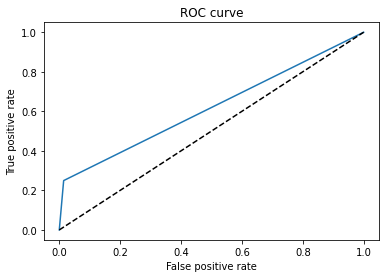

In [28]:
X = data_final.drop(labels=['subscribed'], axis=1)

LogRegOptimizer(X = X, y = data_final.subscribed)